# Data Exploration

In this notebook I will explore processed datasets named "merged.csv" and perform some descriprive analysis.

## Import Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.options.display.max_rows = 4000
pd.options.display.max_columns = 80
# Import additional files with statistical functions
import sys
import os

module_path = os.path.abspath(os.path.join('../../src'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import explore_data as ed 
import assumptions as asm

## Import Dataset

Upload "merged.csv" into df variable

In [2]:
df = pd.read_csv("../../data/processed/merged.csv", dtype={'PIN': str, 'Major': str, 'Minor': str})

ed.show_info(df)

Lenght of Dataset: 46414
                       missing_values_% Data_type
PIN                                 0.0    object
Major                               0.0    object
Minor                               0.0    object
PropType                            0.0    object
HBUAsIfVacant                       0.0   float64
HBUAsImproved                       0.0   float64
SqFtLot                             0.0   float64
WaterSystem                         0.0   float64
SewerSystem                         0.0   float64
Access                              0.0   float64
Topography                          0.0   float64
StreetSurface                       0.0   float64
RestrictiveSzShape                  0.0   float64
WfntLocation                        0.0   float64
WfntFootage                         0.0   float64
LotDepthFactor                      0.0   float64
NbrBldgSites                        0.0   float64
CurrentUseDesignation               0.0   float64
ExciseTaxNbr             

Move the target variable, which is "SalePrice" to the first column.

In [3]:
letters_index = (df.columns).get_loc("SalePrice")
print(letters_index)

19


In [4]:
cols = list(df.columns)
cols = [cols[19]] + cols[:19] + cols[20:]
df = df[cols]
df.head(20)

,SalePrice,PIN,Major,Minor,PropType,HBUAsIfVacant,HBUAsImproved,SqFtLot,WaterSystem,SewerSystem,Access,Topography,StreetSurface,RestrictiveSzShape,WfntLocation,WfntFootage,LotDepthFactor,NbrBldgSites,CurrentUseDesignation,ExciseTaxNbr,SaleInstrument,SaleReason,BldgGrade,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtUnfinFull,SqFtUnfinHalf,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,FinBasementGrade,SqFtGarageBasement,SqFtGarageAttached,SqFtOpenPorch,SqFtEnclosedPorch,SqFtDeck,HeatSystem,HeatSource,BrickStone,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,FpSingleStory,FpMultiStory,FpFreestanding,FpAdditional,YrBuilt,YrRenovated,Obsolescence,PcntNetCondition,Condition,AddnlCost
0,847888,8078410410,807841,0410,R,1.0,1.0,7424.0,2.0,2.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3005895,3,1,8.0,1360.0,0.0,840.0,0.0,0.0,0.0,2200.0,0.0,0.0,0.0,0.0,460.0,0.0,0.0,0.0,5.0,2.0,0.0,4.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1987.0,0.0,0.0,0.0,3.0,0.0
1,875000,8824900210,882490,0210,R,1.0,1.0,3600.0,2.0,2.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2958914,3,1,8.0,1300.0,590.0,0.0,0.0,0.0,0.0,1890.0,750.0,0.0,0.0,220.0,0.0,190.0,0.0,0.0,5.0,1.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1919.0,0.0,0.0,0.0,3.0,0.0
2,612000,5137630080,513763,0080,R,1.0,1.0,5239.0,2.0,2.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2976399,3,1,8.0,1157.0,0.0,1641.0,0.0,0.0,0.0,2798.0,0.0,0.0,0.0,0.0,490.0,214.0,0.0,0.0,5.0,2.0,0.0,4.0,1.0,0.0,2.0,1.0,0.0,0.0,0.0,2018.0,0.0,0.0,0.0,3.0,0.0
3,1368000,7613700830,761370,0830,R,1.0,1.0,8000.0,2.0,2.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3028950,3,1,9.0,1100.0,800.0,0.0,0.0,0.0,0.0,2300.0,1050.0,400.0,9.0,0.0,340.0,0.0,0.0,0.0,5.0,2.0,85.0,4.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1940.0,0.0,0.0,0.0,3.0,0.0
4,425000,1453600381,145360,0381,R,1.0,1.0,11760.0,2.0,2.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2817172,3,1,7.0,890.0,0.0,0.0,0.0,0.0,0.0,890.0,890.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1942.0,0.0,0.0,0.0,3.0,0.0
5,625000,1453600381,145360,0381,R,1.0,1.0,11760.0,2.0,2.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3029082,3,1,7.0,890.0,0.0,0.0,0.0,0.0,0.0,890.0,890.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1942.0,0.0,0.0,0.0,3.0,0.0
6,465000,2597690290,259769,0290,R,1.0,1.0,7000.0,2.0,2.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2870672,3,1,8.0,1190.0,0.0,660.0,0.0,0.0,0.0,1850.0,0.0,0.0,0.0,0.0,510.0,0.0,0.0,380.0,5.0,2.0,0.0,4.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1985.0,0.0,0.0,0.0,3.0,0.0
7,0,0208500020,020850,0020,R,1.0,1.0,5814.0,2.0,2.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3050029,27,18,8.0,1490.0,0.0,0.0,0.0,0.0,0.0,2400.0,1440.0,910.0,7.0,530.0,0.0,270.0,0.0,0.0,5.0,2.0,0.0,5.0,0.0,1.0,2.0,0.0,1.0,0.0,1.0,1964.0,0.0,0.0,0.0,3.0,3000.0
8,700000,7302000190,730200,0190,R,1.0,1.0,47862.0,2.0,1.0,4.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2976418,3,1,8.0,1480.0,0.0,0.0,0.0,0.0,0.0,2770.0,1410.0,1290.0,7.0,0.0,500.0,40.0,0.0,500.0,5.0,3.0,0.0,5.0,1.0,2.0,1.0,1.0,0.0,0.0,0.0,1978.0,0.0,0.0,0.0,3.0,0.0
9,0,3332500015,333250,0015,R,1.0,1.0,6600.0,2.0,2.0,4.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3037909,15,18,7.0,1520.0,0.0,0.0,0.0,0.0,0.0,2560.0,1100.0,1040.0,6.0,0.0,0.0,0.0,0.0,290.0,5.0,2.0,0.0,4.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1962.0,0.0,0.0,0.0,3.0,0.0


### Descriptive Statistics

Perform descriptive analysis to get the mean, standart deviation and value counts of the columns

In [5]:
df.describe()

,SalePrice,HBUAsIfVacant,HBUAsImproved,SqFtLot,WaterSystem,SewerSystem,Access,Topography,StreetSurface,RestrictiveSzShape,WfntLocation,WfntFootage,LotDepthFactor,NbrBldgSites,CurrentUseDesignation,ExciseTaxNbr,SaleInstrument,SaleReason,BldgGrade,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtUnfinFull,SqFtUnfinHalf,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,FinBasementGrade,SqFtGarageBasement,SqFtGarageAttached,SqFtOpenPorch,SqFtEnclosedPorch,SqFtDeck,HeatSystem,HeatSource,BrickStone,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,FpSingleStory,FpMultiStory,FpFreestanding,FpAdditional,YrBuilt,YrRenovated,Obsolescence,PcntNetCondition,Condition,AddnlCost
count,4.641400e+04,46414.000000,46414.000000,4.641400e+04,46414.000000,46414.000000,46414.000000,46414.000000,46414.000000,46414.000000,46414.000000,46414.000000,46414.000000,46414.000000,46414.000000,4.641400e+04,46414.000000,46414.000000,46414.000000,46414.000000,46414.000000,46414.000000,46414.000000,46414.000000,46414.000000,46414.000000,46414.000000,46414.000000,46414.000000,46414.000000,46414.000000,46414.000000,46414.000000,46414.000000,46414.000000,46414.000000,46414.000000,46414.000000,46414.000000,46414.000000,46414.000000,46414.000000,46414.000000,46414.000000,46414.000000,46414.000000,46414.000000,46414.000000,46414.000000,46414.0,46414.000000
mean,6.004239e+05,1.045848,1.005429,1.802569e+04,1.972293,1.867734,3.931745,0.089025,1.018270,0.004503,0.130349,1.966411,0.074417,0.007907,0.005559,2.946110e+06,5.437497,2.049274,7.848753,1334.649071,38.720020,652.996337,6.428685,0.757358,0.645969,2310.502176,468.428879,279.178610,2.517236,80.031499,316.441138,85.736911,4.787349,125.773366,4.970828,2.045913,3.340070,3.505817,0.534128,0.445598,1.685526,0.706102,0.295342,0.057763,0.163227,1978.268626,155.223058,0.128237,0.009437,3.0,964.508467
std,6.344882e+05,0.499767,0.097214,6.203893e+04,0.166351,0.340370,0.272868,0.284783,0.197506,0.066954,0.947134,20.732831,2.687042,0.239583,0.124945,7.389506e+04,5.324475,4.044621,1.269531,505.067035,151.933399,728.472390,70.520238,20.858693,19.171722,1057.315405,613.452103,464.201417,3.533093,192.605766,303.726549,147.355668,33.892938,682.836620,0.910212,0.565323,16.367259,0.958042,0.539948,0.645821,0.736091,0.665210,0.498840,0.243066,0.386559,30.479619,535.726265,2.223292,0.570761,0.0,3171.391823
min,-2.000000e+02,0.000000,0.000000,6.120000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.712298e+06,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,3.0,0.000000
25%,2.000000e+05,1.000000,1.000000,5.431000e+03,2.000000,2.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.870347e+06,3.000000,1.000000,7.000000,1010.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1570.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2.000000,0.000000,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1955.000000,0.000000,0.000000,0.000000,3.0,0.000000
50%,5.050000e+05,1.000000,1.000000,7.622000e+03,2.000000,2.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.962350e+06,3.000000,1.000000,8.000000,1250.000000,0.000000,335.000000,0.000000,0.000000,0.000000,2150.000000,0.000000,0.000000,0.000000,0.000000,380.000000,40.000000,0.000000,0.000000,5.000000,2.000000,0.000000,3.000000,1.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1986.000000,0.000000,0.000000,0.000000,3.0,0.000000
75%,8.010000e+05,1.000000,1.000000,1.092900e+04,2.000000,2.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.008428e+06,3.000000,1.000000,9.000000,1530.000000,0.000000,1260.000000

- The statistics show that average price for houses is $514 781. 
- The standart deviation of the target variable (Sale Price) is \$836 779. 

### Remove Outliers

I will use statistic function from explore_data file to remove outliers from dataset

In [6]:
cols = ['SalePrice', 'SqFtOpenPorch', 'SqFtDeck', 'AddnlCost', 'SqFtGarageAttached', 
        'SqFtTotBasement', 'SqFtTotLiving']

for column in df[cols]:
    df = ed.remove_outliers(df, column)
df.describe()

,SalePrice,HBUAsIfVacant,HBUAsImproved,SqFtLot,WaterSystem,SewerSystem,Access,Topography,StreetSurface,RestrictiveSzShape,WfntLocation,WfntFootage,LotDepthFactor,NbrBldgSites,CurrentUseDesignation,ExciseTaxNbr,SaleInstrument,SaleReason,BldgGrade,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtUnfinFull,SqFtUnfinHalf,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,FinBasementGrade,SqFtGarageBasement,SqFtGarageAttached,SqFtOpenPorch,SqFtEnclosedPorch,SqFtDeck,HeatSystem,HeatSource,BrickStone,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,FpSingleStory,FpMultiStory,FpFreestanding,FpAdditional,YrBuilt,YrRenovated,Obsolescence,PcntNetCondition,Condition,AddnlCost
count,3.301800e+04,33018.000000,33018.000000,3.301800e+04,33018.000000,33018.000000,33018.000000,33018.000000,33018.000000,33018.000000,33018.000000,33018.000000,33018.000000,33018.000000,33018.000000,3.301800e+04,33018.000000,33018.000000,33018.000000,33018.000000,33018.000000,33018.000000,33018.000000,33018.000000,33018.000000,33018.000000,33018.000000,33018.000000,33018.000000,33018.000000,33018.000000,33018.000000,33018.000000,33018.000000,33018.000000,33018.000000,33018.000000,33018.000000,33018.000000,33018.000000,33018.000000,33018.000000,33018.000000,33018.000000,33018.000000,33018.000000,33018.000000,33018.000000,33018.000000,33018.0,33018.0
mean,4.886917e+05,1.053789,1.005906,1.360586e+04,1.980677,1.890393,3.946635,0.071718,1.014659,0.003059,0.059089,0.829487,0.036041,0.006996,0.002181,2.947392e+06,5.570174,2.090193,7.537071,1231.501635,42.248410,493.464565,4.204252,0.654703,0.646708,2006.664335,441.205676,236.641377,2.332273,78.239778,261.945091,50.624629,4.929342,76.886698,4.881671,2.025017,3.886032,3.356139,0.457781,0.396299,1.535284,0.622509,0.286056,0.060967,0.161579,1972.627355,146.460446,0.135411,0.006814,3.0,0.0
std,3.874751e+05,0.538053,0.093695,5.392962e+04,0.137659,0.313082,0.240138,0.258025,0.178577,0.055224,0.648835,13.033235,1.695004,0.135632,0.077017,7.363064e+04,5.444608,4.119278,1.057214,376.605695,150.743058,640.022240,55.825643,20.218660,19.299675,780.624118,545.211057,382.178404,3.290655,175.568107,269.829597,67.268990,30.979440,117.575150,0.907188,0.598363,17.851872,0.918675,0.513254,0.577868,0.657222,0.585407,0.472370,0.247731,0.374999,30.746342,521.626616,2.357073,0.432410,0.0,0.0
min,-2.000000e+02,0.000000,0.000000,6.120000e+02,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.712298e+06,0.000000,1.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,3.0,0.0
25%,0.000000e+00,1.000000,1.000000,5.200500e+03,2.000000,2.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.871856e+06,3.000000,1.000000,7.000000,970.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1420.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2.000000,0.000000,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1951.000000,0.000000,0.000000,0.000000,3.0,0.0
50%,4.750000e+05,1.000000,1.000000,7.350000e+03,2.000000,2.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.964024e+06,3.000000,1.000000,7.000000,1190.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1930.000000,0.000000,0.000000,0.000000,0.000000,230.000000,0.000000,0.000000,0.000000,5.000000,2.000000,0.000000,3.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1977.000000,0.000000,0.000000,0.000000,3.0,0.0
75%,7.320000e+05,1.000000,1.000000,9.793500e+03,2.000000,2.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.008992e+06,3.000000,1.000000,8.000000,1430.000000,0.000000,1058.000000,0.000000,0.000000,0.000000,2520.000000,94

Plot histograms for the whole dataset

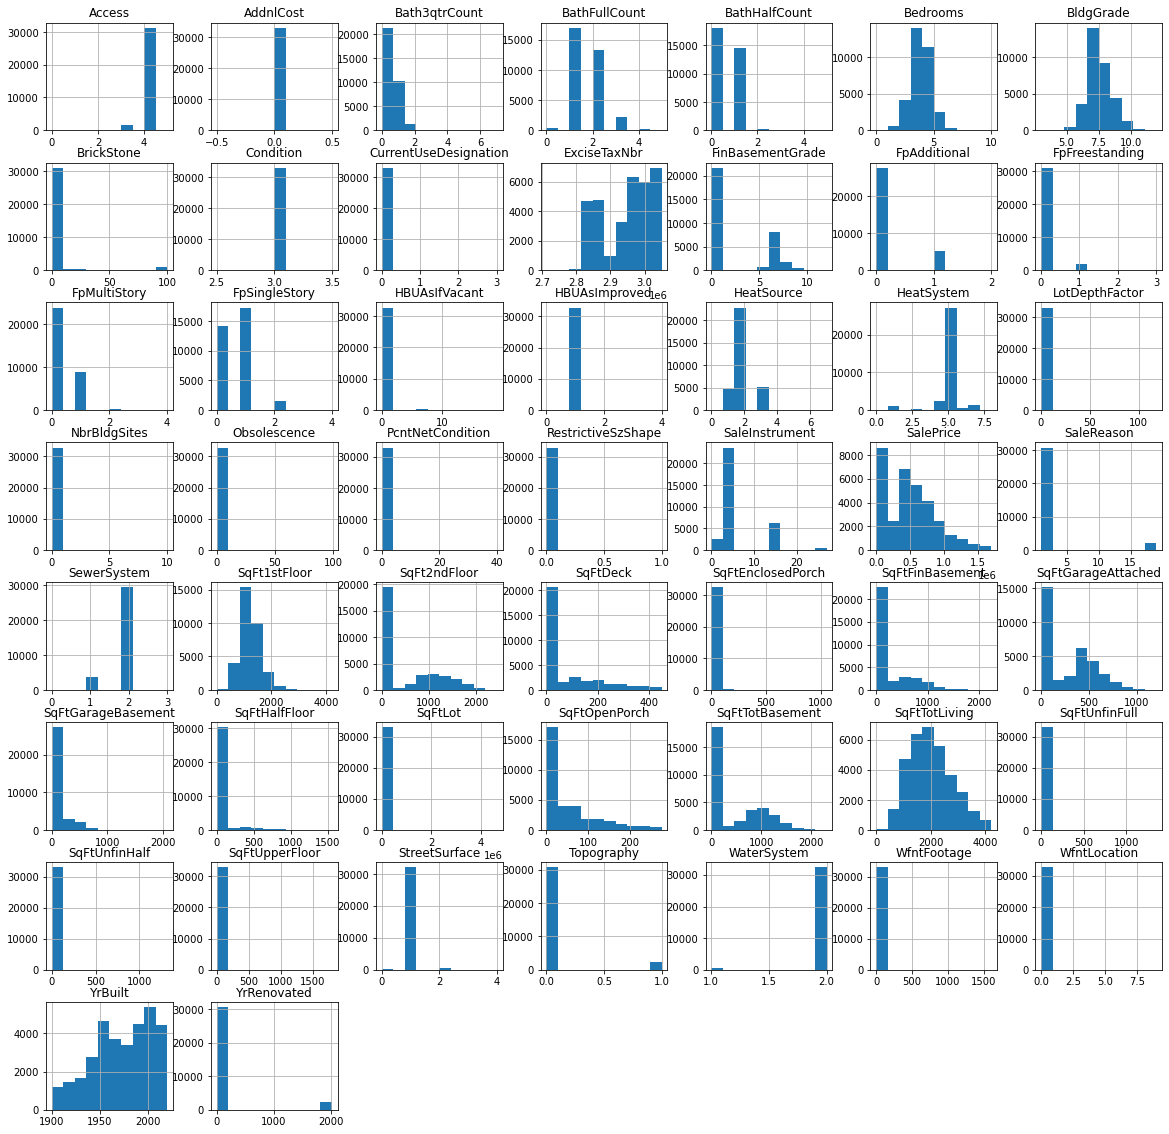

In [7]:
df.hist(figsize = (20,20));

The histograms show that most of the variables are not normally distributed and are positively skewed.

### Normalize Data

In [8]:
df[cols] = df[cols].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
df.describe()

,SalePrice,HBUAsIfVacant,HBUAsImproved,SqFtLot,WaterSystem,SewerSystem,Access,Topography,StreetSurface,RestrictiveSzShape,WfntLocation,WfntFootage,LotDepthFactor,NbrBldgSites,CurrentUseDesignation,ExciseTaxNbr,SaleInstrument,SaleReason,BldgGrade,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtUnfinFull,SqFtUnfinHalf,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,FinBasementGrade,SqFtGarageBasement,SqFtGarageAttached,SqFtOpenPorch,SqFtEnclosedPorch,SqFtDeck,HeatSystem,HeatSource,BrickStone,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,FpSingleStory,FpMultiStory,FpFreestanding,FpAdditional,YrBuilt,YrRenovated,Obsolescence,PcntNetCondition,Condition,AddnlCost
count,33018.000000,33018.000000,33018.000000,3.301800e+04,33018.000000,33018.000000,33018.000000,33018.000000,33018.000000,33018.000000,33018.000000,33018.000000,33018.000000,33018.000000,33018.000000,3.301800e+04,33018.000000,33018.000000,33018.000000,33018.000000,33018.000000,33018.000000,33018.000000,33018.000000,33018.000000,33018.000000,33018.000000,33018.000000,33018.000000,33018.000000,33018.000000,33018.000000,33018.000000,33018.000000,33018.000000,33018.000000,33018.000000,33018.000000,33018.000000,33018.000000,33018.000000,33018.000000,33018.000000,33018.000000,33018.000000,33018.000000,33018.000000,33018.000000,33018.000000,33018.0,0.0
mean,0.287212,1.053789,1.005906,1.360586e+04,1.980677,1.890393,3.946635,0.071718,1.014659,0.003059,0.059089,0.829487,0.036041,0.006996,0.002181,2.947392e+06,5.570174,2.090193,7.537071,1231.501635,42.248410,493.464565,4.204252,0.654703,0.646708,0.475264,0.190998,236.641377,2.332273,78.239778,0.218288,0.184090,4.929342,0.170859,4.881671,2.025017,3.886032,3.356139,0.457781,0.396299,1.535284,0.622509,0.286056,0.060967,0.161579,1972.627355,146.460446,0.135411,0.006814,3.0,NaN
std,0.227632,0.538053,0.093695,5.392962e+04,0.137659,0.313082,0.240138,0.258025,0.178577,0.055224,0.648835,13.033235,1.695004,0.135632,0.077017,7.363064e+04,5.444608,4.119278,1.057214,376.605695,150.743058,640.022240,55.825643,20.218660,19.299675,0.185070,0.236022,382.178404,3.290655,175.568107,0.224858,0.244615,30.979440,0.261278,0.907188,0.598363,17.851872,0.918675,0.513254,0.577868,0.657222,0.585407,0.472370,0.247731,0.374999,30.746342,521.626616,2.357073,0.432410,0.0,NaN
min,0.000000,0.000000,0.000000,6.120000e+02,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.712298e+06,0.000000,1.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,3.0,NaN
25%,0.000117,1.000000,1.000000,5.200500e+03,2.000000,2.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.871856e+06,3.000000,1.000000,7.000000,970.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.336178,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2.000000,0.000000,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1951.000000,0.000000,0.000000,0.000000,3.0,NaN
50%,0.279168,1.000000,1.000000,7.350000e+03,2.000000,2.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.964024e+06,3.000000,1.000000,7.000000,1190.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.457089,0.000000,0.000000,0.000000,0.000000,0.191667,0.000000,0.000000,0.000000,5.000000,2.000000,0.000000,3.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1977.000000,0.000000,0.000000,0.000000,3.0,NaN
75%,0.430149,1.000000,1.000000,9.793500e+03,2.000000,2.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.008992e+06,3.000000,1.000000,8.000000,1430.000000,0.000000,1058.000000,0.000000,0.000000,0.000000,0.596965,0.406926,460.000000,6.000000,0.000000,0.400000,0.290909,0.00

In [9]:
df.isna().sum()

SalePrice                    0
PIN                          0
Major                        0
Minor                        0
PropType                     0
HBUAsIfVacant                0
HBUAsImproved                0
SqFtLot                      0
WaterSystem                  0
SewerSystem                  0
Access                       0
Topography                   0
StreetSurface                0
RestrictiveSzShape           0
WfntLocation                 0
WfntFootage                  0
LotDepthFactor               0
NbrBldgSites                 0
CurrentUseDesignation        0
ExciseTaxNbr                 0
SaleInstrument               0
SaleReason                   0
BldgGrade                    0
SqFt1stFloor                 0
SqFtHalfFloor                0
SqFt2ndFloor                 0
SqFtUpperFloor               0
SqFtUnfinFull                0
SqFtUnfinHalf                0
SqFtTotLiving                0
SqFtTotBasement              0
SqFtFinBasement              0
FinBasem

## Build Heatmap

I will build Heatmap in order to see how the providet data correlates with target variable.

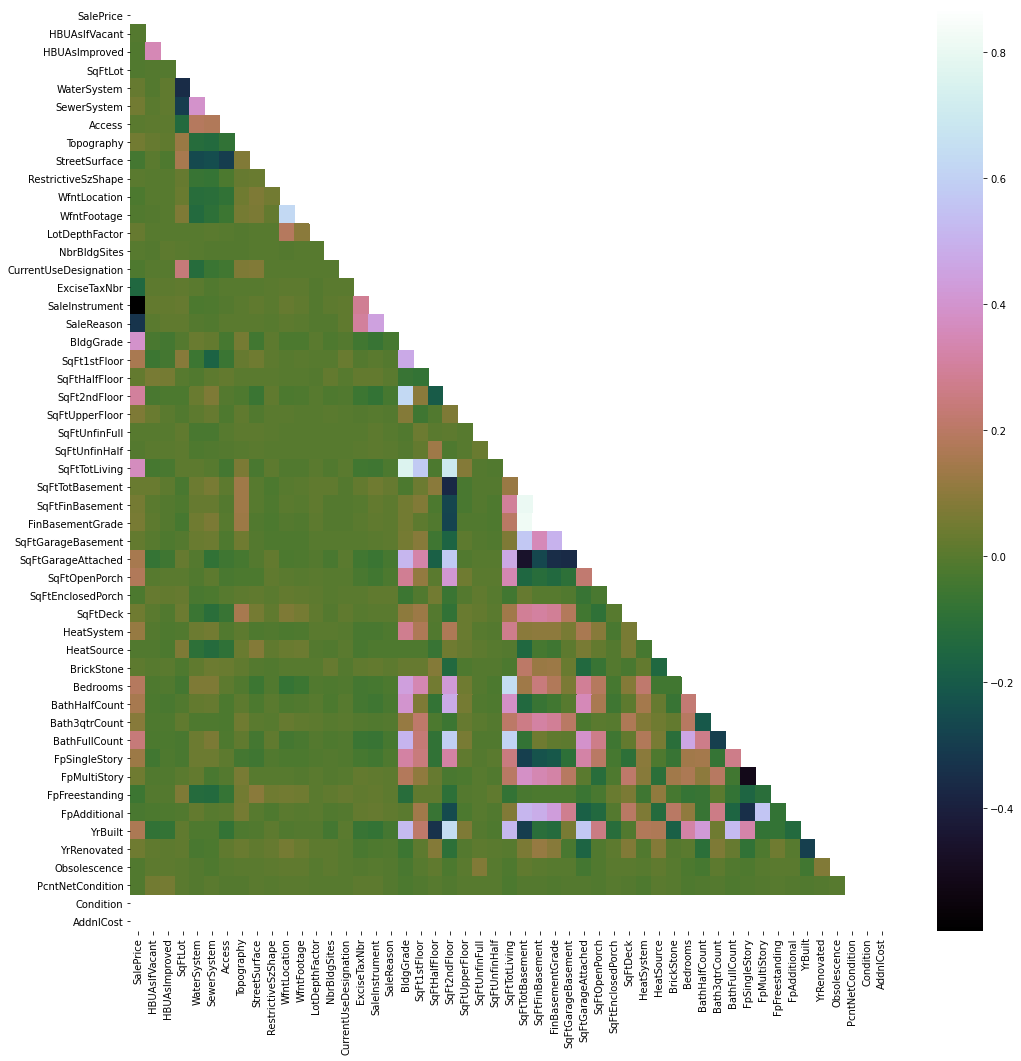

In [10]:
corr = df.corr(method = 'pearson')

mask = np.triu(np.ones_like(corr, dtype=np.bool))

fig1, ax1 = plt.subplots(figsize=(17,17))
sns.heatmap(corr, mask = mask, ax = ax1, cmap="cubehelix");

Calculate the correlation coefficients for all variables to finf most correlated features

In [11]:
corr_matrix = df.corr()
corr_mat = corr_matrix["SalePrice"].sort_values(ascending=False)
print(corr_mat)

SalePrice                1.000000
BldgGrade                0.395625
SqFtTotLiving            0.363158
SqFt2ndFloor             0.304632
BathFullCount            0.237867
Bedrooms                 0.188797
SqFtOpenPorch            0.178375
YrBuilt                  0.163185
SqFt1stFloor             0.159179
BathHalfCount            0.152129
SqFtGarageAttached       0.150616
FpSingleStory            0.128268
HeatSystem               0.116204
Bath3qtrCount            0.089585
SqFtUpperFloor           0.073183
FinBasementGrade         0.059368
SqFtFinBasement          0.054541
SewerSystem              0.052400
Topography               0.048674
FpMultiStory             0.047143
SqFtDeck                 0.044216
YrRenovated              0.043231
SqFtTotBasement          0.030606
WaterSystem              0.025706
LotDepthFactor           0.024808
SqFtGarageBasement       0.024294
SqFtHalfFloor            0.023213
BrickStone               0.008872
Access                   0.006119
RestrictiveSzS

Table shows that most correlated features are building grade, square feet of total living, square feet of second floor, square feet of first floor, bath full count and square feet of open porch. 

Build a pairplot for the features above.

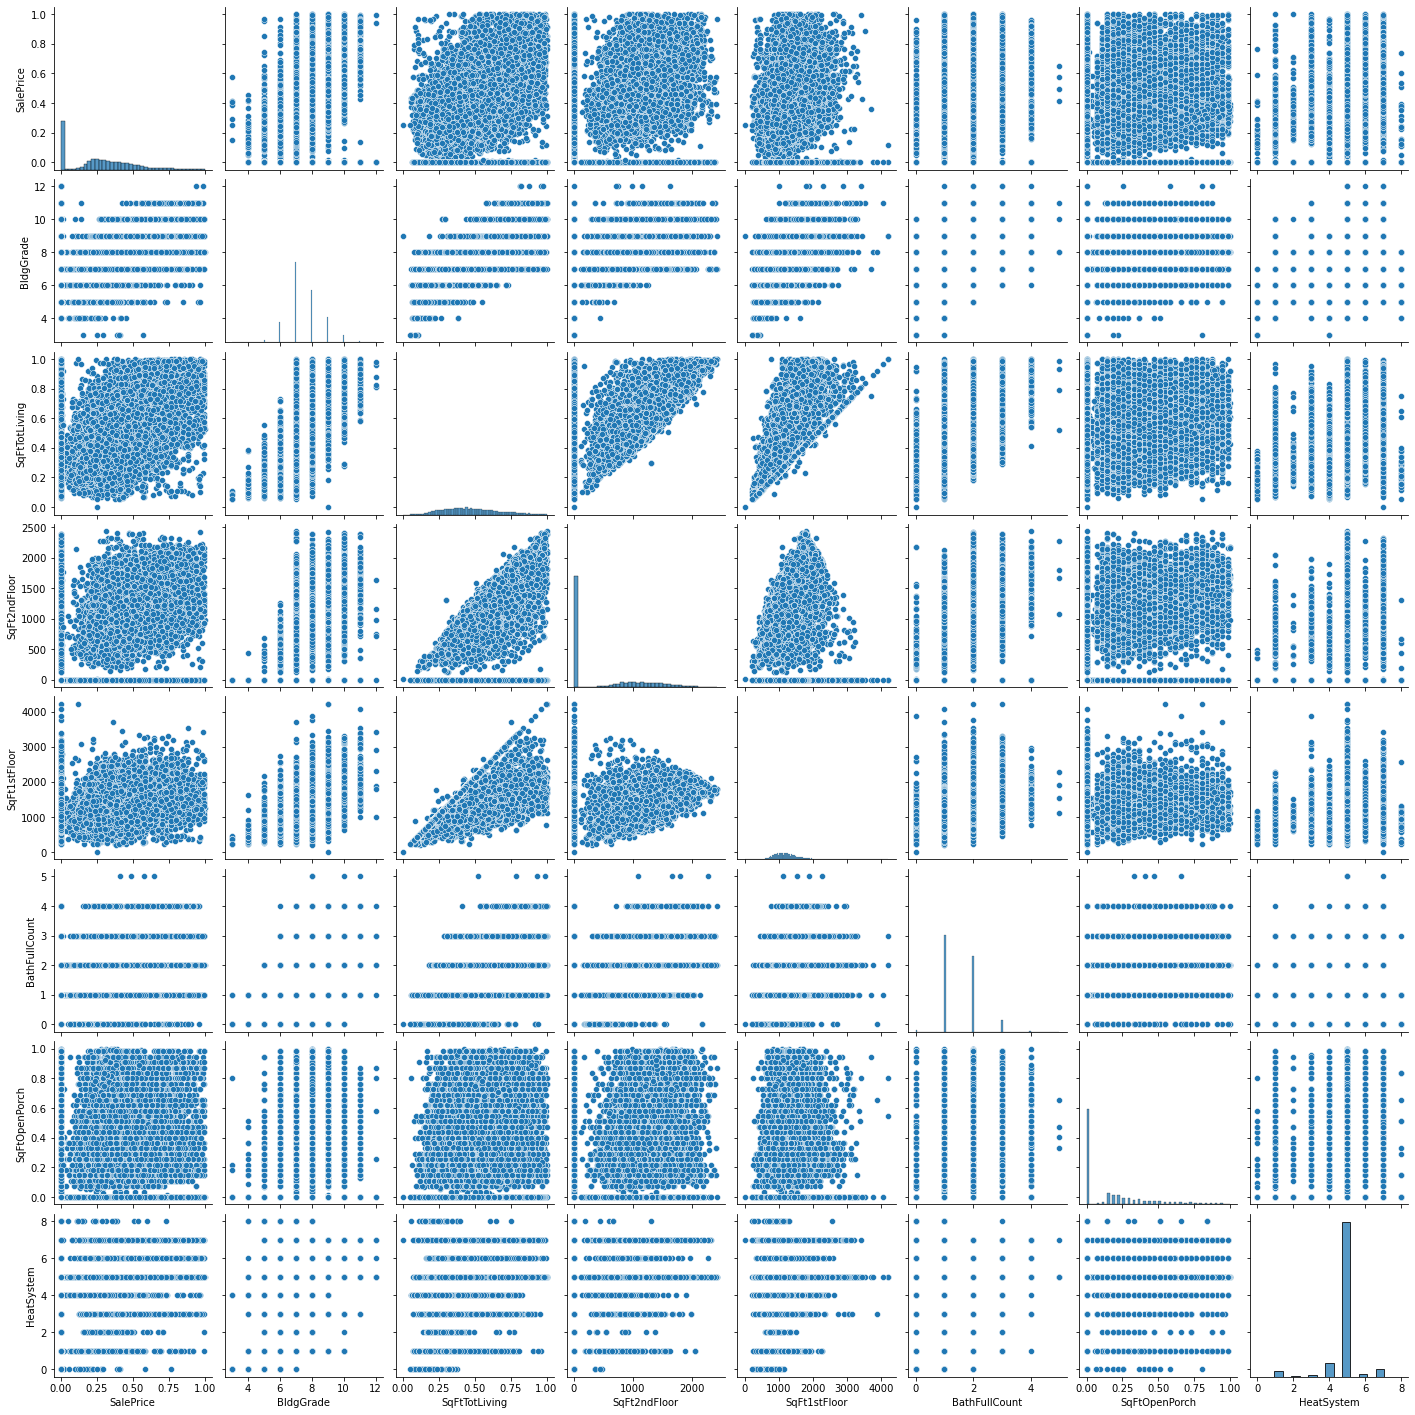

In [12]:
positively_correlated_cols = ['SalePrice', 'BldgGrade', 'SqFtTotLiving', 'SqFt2ndFloor', 
                              'SqFt1stFloor', 'BathFullCount', 'SqFtOpenPorch', 'HeatSystem']
positively_correlated_df = df[positively_correlated_cols]
sns.pairplot(positively_correlated_df);

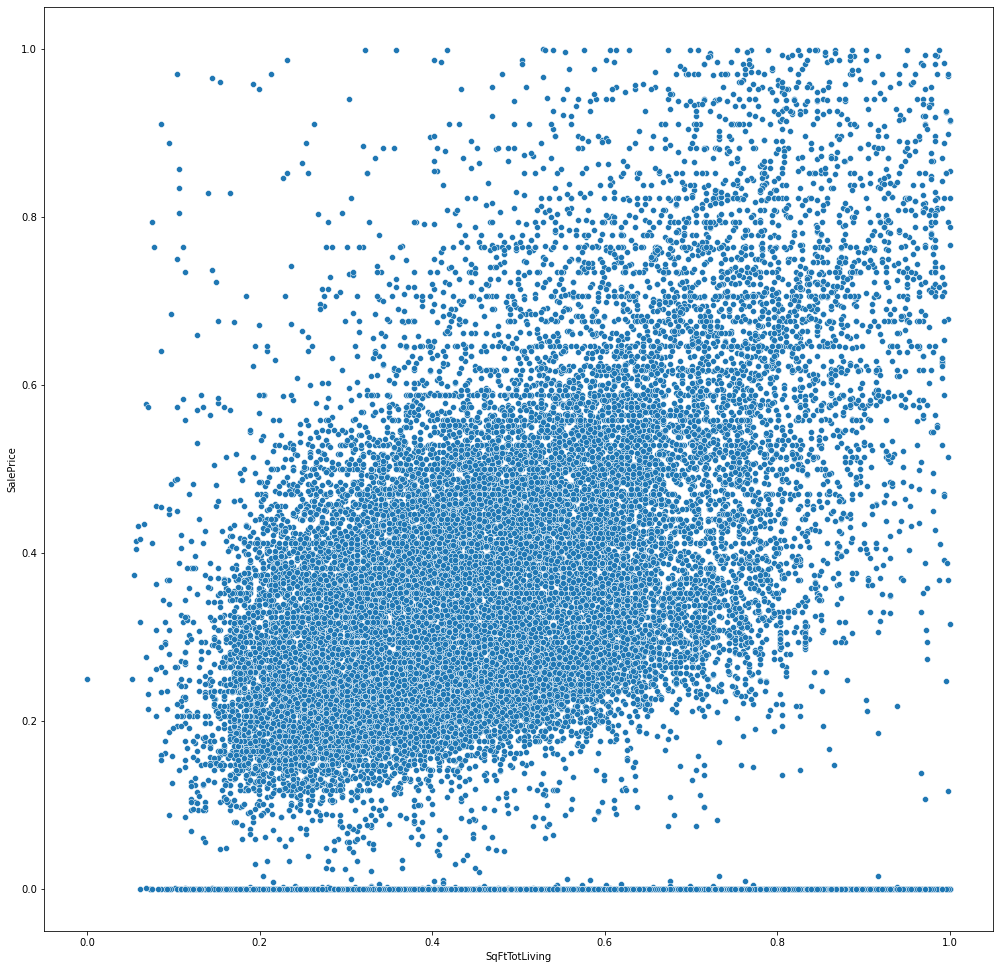

In [13]:
fig1, ax1 = plt.subplots(figsize=(17,17))
sns.scatterplot(data=df, x="SqFtTotLiving", y="SalePrice")

In [14]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.diagnostic import linear_rainbow, het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import LabelEncoder

In [15]:
fsm_df = df[["SalePrice", "SqFtTotLiving"]].copy()
fsm = ols(formula="SalePrice ~SqFtTotLiving " , data=fsm_df)
fsm_results = fsm.fit()
fsm_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.132
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     5016.
Date:                Fri, 19 Mar 2021   Prob (F-statistic):               0.00
Time:                        16:01:37   Log-Likelihood:                 4352.3
No. Observations:               33018   AIC:                            -8701.
Df Residuals:                   33016   BIC:                            -8684.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.0749      0.003     23.291      0.000       0.069       0.081
SqFtTotLiving     0.4467      0.006     70.822      0.000       0.434       0.459
==============================================================================
Omnibus:                      113.633   Durbin-Watson:                   1.934
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               88.165
Skew:                           0.029   Prob(JB):                     7.16e-20
Kurtosis:                       2.754   Cond. No.                         6.66
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

LINEARITY CHECK

Rainbow statistic: 0.9917627287897006
Rainbow p-value: 0.7024152090038358

NORMALITY CHECK

HOMOSCADASTICITY CHECK


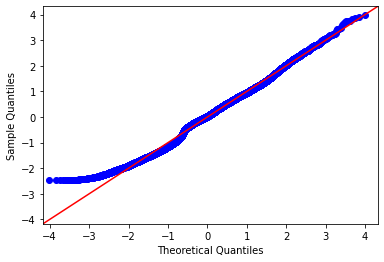

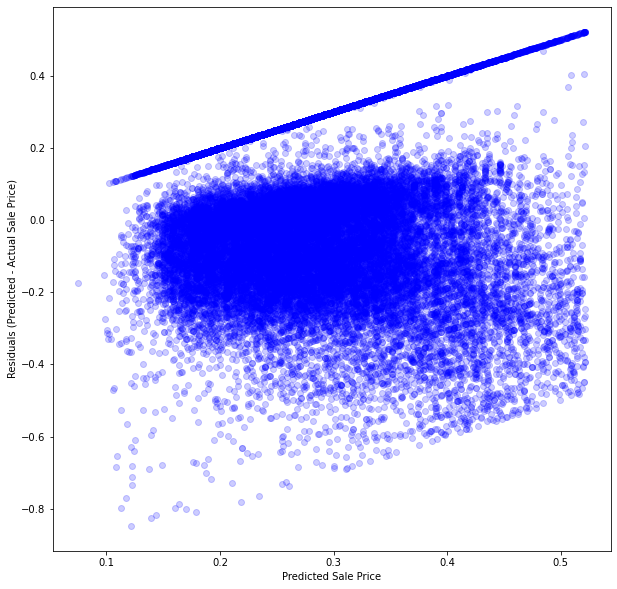

In [16]:
asm.assumptions(fsm_results, fsm_df)

In [27]:
y = fsm_df["SalePrice"]
y_hat = fsm_results.predict()
y2 = y_hat - y
fsm_df[y_hat>0.4]

,SalePrice,SqFtTotLiving
43,0.000117,0.760550
56,0.572906,0.729730
80,0.317354,0.786629
86,0.000117,0.743954
87,0.308542,0.743954
88,0.308542,0.743954
89,0.000117,0.743954
90,0.255669,0.743954
91,0.781459,0.819820
97,0.323229,0.784258


In [17]:
import statsmodels.api as sm


def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ 
    Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
      
    return included

In [18]:
X = df.drop(['SalePrice', 'Minor', 'Major', 'PIN', 'PropType','AddnlCost'], axis=1)
y = df['SalePrice']

result = stepwise_selection(X, y, verbose = True)
print('resulting features:')
print(result)

<ipython-input-17-887662818fac>:28: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  Condition                      with p-value 0.0
Add  SqFtTotLiving                  with p-value 0.0
Add  SaleReason                     with p-value 0.0
Add  SaleInstrument                 with p-value 0.0
Add  BldgGrade                      with p-value 0.0
Add  YrBuilt                        with p-value 4.71833e-166
Add  SqFt1stFloor                   with p-value 5.71277e-67
Add  ExciseTaxNbr                   with p-value 2.45459e-41
Add  Bedrooms                       with p-value 3.36256e-40
Add  SqFtGarageAttached             with p-value 4.90108e-37
Add  FpAdditional                   with p-value 5.2141e-38
Add  Bath3qtrCount                  with p-value 2.64482e-19
Add  SqFtFinBasement                with p-value 3.12314e-19
Add  SqFtOpenPorch                  with p-value 1.30674e-10
Add  SqFtUpperFloor                 with p-value 1.02254e-10
Add  BathFullCount                  with p-value 1.62767e-08
Add  SewerSystem                    with p-value 3.99055e-07
Add

In [19]:
import statsmodels.api as sm
X_fin = X[result]
X_with_intercept = sm.add_constant(X_fin)
model = sm.OLS(y,X_with_intercept).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.526
Model:                            OLS   Adj. R-squared:                  0.526
Method:                 Least Squares   F-statistic:                     1525.
Date:                Fri, 19 Mar 2021   Prob (F-statistic):               0.00
Time:                        16:01:53   Log-Likelihood:                 14337.
No. Observations:               33018   AIC:                        -2.862e+04
Df Residuals:                   32993   BIC:                        -2.841e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Condition              0.3947      0.032     12.293      0.000       0.332       0.458
SqFtTotLiving          0.3469      0.012     30.126      0.000       0.324       0.369
SaleReason            -0.0050      0.000    -21.108      0.000      -0.006      -0.005
SaleInstrument        -0.0229      0.000   -126.835      0.000      -0.023      -0.023
BldgGrade              0.0607      0.001     43.012      0.000       0.058       0.063
YrBuilt               -0.0009   4.56e-05    -20.282      0.000      -0.001      -0.001
SqFt1stFloor       -4.137e-05   3.21e-06    -12.896      0.000   -4.77e-05   -3.51e-05
ExciseTaxNbr        1.726e-07   1.25e-08     13.802      0.000    1.48e-07    1.97e-07
Bedrooms              -0.0167      0.001    -13.034      0.000      -0.019      -0.014
SqFtGarageAttached    -0.0709      0.006    -11.460      0.000      -0.083      -0.059
FpAdditional          -0.0186      0.003     -5.840      0.000      -0.025      -0.012
Bath3qtrCount          0.0220      0.002     11.335      0.000       0.018       0.026
SqFtFinBasement    -5.149e-05   5.79e-06     -8.888      0.000   -6.28e-05   -4.01e-05
SqFtOpenPorch          0.0230      0.004      5.810      0.000       0.015       0.031
SqFtUpperFloor         0.0001   1.58e-05      6.321      0.000     6.9e-05       0.000
BathFullCount          0.0109      0.002      4.994      0.000       0.007       0.015
SewerSystem            0.0173      0.003      5.721      0.000       0.011       0.023
Topography             0.0177      0.003      5.122      0.000       0.011       0.024
FpMultiStory          -0.0116      0.002     -4.873      0.000      -0.016      -0.007
SqFtTotBasement        0.0418      0.009      4.737      0.000       0.025       0.059
LotDepthFactor         0.0021      0.001      4.149      0.000       0.001       0.003
SqFtLot             6.172e-08   1.69e-08      3.654      0.000    2.86e-08    9.48e-08
SqFtGarageBasement -2.924e-05   7.35e-06     -3.980      0.000   -4.36e-05   -1.48e-05
FinBasementGrade       0.0019      0.001      2.985      0.003       0.001       0.003
FpFreestanding        -0.0093      0.004     -2.600      0.009      -0.016      -0.002
==============================================================================
Omnibus:                     1496.916   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5199.590
Skew:                           0.060   Prob(JB):                         0.00
Kurtosis:                       4.940   Cond. No.                     1.11e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+08. This might indicate that 

In [20]:
df['SaleInstrument'].value_counts()

3     23638
15     6150
2      2600
26      294
27      223
18       68
24       13
8        11
4         7
22        6
19        3
10        2
21        1
5         1
0         1
Name: SaleInstrument, dtype: int64

In [21]:
df['SaleReason'].value_counts()

1     30803
18     1994
8        51
5        33
16       30
10       29
13       23
11       21
14       16
19        7
12        5
4         5
9         1
Name: SaleReason, dtype: int64

In [22]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.diagnostic import linear_rainbow, het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import LabelEncoder

In [23]:
fsm_df = df[["SalePrice", "SqFtTotLiving"]].copy()


In [24]:
fsm = ols(formula="SalePrice ~SqFtTotLiving" , data=fsm_df)
fsm_results = fsm.fit()

In [25]:
fsm_results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.132
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     5016.
Date:                Fri, 19 Mar 2021   Prob (F-statistic):               0.00
Time:                        16:01:53   Log-Likelihood:                 4352.3
No. Observations:               33018   AIC:                            -8701.
Df Residuals:                   33016   BIC:                            -8684.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.0749      0.003     23.291      0.000       0.069       0.081
SqFtTotLiving     0.4467      0.006     70.822      0.000       0.434       0.459
==============================================================================
Omnibus:                      113.633   Durbin-Watson:                   1.934
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               88.165
Skew:                           0.029   Prob(JB):                     7.16e-20
Kurtosis:                       2.754   Cond. No.                         6.66
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""